<a href="https://colab.research.google.com/github/jajoonaman/ML_DL_Work/blob/main/XG_Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost Regression

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks.

In [ ]:
import io
 
from google.colab import files
 
upload = files.upload()

Saving Asteroid_Updated.csv to Asteroid_Updated.csv


### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Data

In [ ]:
data = pd.read_csv("Asteroid_Updated.csv")

data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


### Getting the info


1.   Shape
2.   Columns
3.   Data Types
4.   Description

In [ ]:
print("Shape: ", data.shape)

print("\nColumns: ", data.columns)

print("\nTypes: \n",data.dtypes)

print("\n",data.describe())

Shape:  (839714, 31)

Columns:  Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

Types: 
 name               object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
extent             object
albedo            float64
rot_per           float64
GM                float64
BV                float64
UB                float64
IR                float64
spec_B             object
spec_T             object
G            

### Looking into Missing Values

In [ ]:
# Seeing Missing values in data

# Total no. of values that are lost in the features
total = data.isnull().sum().sort_values(ascending=False)

# Percent of values that are lost
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

# Observing the total missing values with there Percentage
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                 Total   Percent
IR              839713  0.999999
GM              839700  0.999983
extent          839696  0.999979
G               839595  0.999858
UB              838735  0.998834
spec_T          838734  0.998833
BV              838693  0.998784
spec_B          838048  0.998016
rot_per         820918  0.977616
name            817747  0.973840
albedo          703305  0.837553
diameter        702078  0.836092
moid             16442  0.019580
pha              16442  0.019580
data_arc         15474  0.018428
H                 2689  0.003202
condition_code     867  0.001032
ma                   8  0.000010
per                  6  0.000007
neo                  6  0.000007
ad                   6  0.000007
n                    2  0.000002
a                    2  0.000002
per_y                1  0.000001
n_obs_used           0  0.000000
class                0  0.000000
q                    0  0.000000
w                    0  0.000000
om                   0  0.000000
i         

### Cleaning and Preparing the dataframe

The target value 'diameter' is of string type, I will convert it to numeric form. This gave errors for some diameter values because they were corrupted, so I added the argument "errors='coerce'" to set corrupted diameters to nan, and then later dropped those nan values.

In [ ]:
# Step 1
data['diameter']=pd.to_numeric(data['diameter'],errors='coerce')

# Step 2
dropindexes = data['diameter'][data['diameter'].isnull()].index 
drop_data = data.loc[dropindexes] # Saving Dropped Rows
df = data.drop(dropindexes, axis=0) 

df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.400,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545.000,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.400,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


#### Dropping irrelevent features and choosing my battles:

1. Dropping all features with more than half nan values
2. Dropping condition_code and neo and pha because most seems to be 0 or nan.

In [ ]:
# Step 1
df = df.drop(df.columns[df.isna().sum()/df.shape[0] > 0.5], axis=1)
# Step 2
df = df.drop(['condition_code', 'neo', 'pha', 'class'], axis=1)

df.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,diameter,albedo,moid,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1002,3.34,939.400,0.0900,1.59478,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,8490,4.13,545.000,0.1010,1.23324,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,7104,5.33,246.596,0.2140,1.03454,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,9325,3.20,525.400,0.4228,1.13948,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,2916,6.85,106.699,0.2740,1.09589,0.238632,1508.600458,282.366289


#### Replacing reamining nan values with mean.

In [ ]:
df = df.fillna(df.mean())

print(df.head())

          a         e          i  ...         n          per          ma
0  2.769165  0.076009  10.594067  ...  0.213885  1683.145708   77.372096
1  2.772466  0.230337  34.836234  ...  0.213503  1686.155999   59.699133
2  2.669150  0.256942  12.988919  ...  0.226019  1592.787285   34.925016
3  2.361418  0.088721   7.141771  ...  0.271609  1325.432765   95.861936
4  2.574249  0.191095   5.366988  ...  0.238632  1508.600458  282.366289

[5 rows x 17 columns]


### Calculating the Corelation of our dataset.

In [ ]:
df.corr()['diameter'].abs().sort_values(ascending=False)

diameter      1.000000
H             0.568596
data_arc      0.492461
n_obs_used    0.386050
moid          0.333053
q             0.330323
n             0.201360
a             0.145015
albedo        0.107535
ad            0.093613
i             0.052897
e             0.049206
per           0.049050
per_y         0.049050
ma            0.009504
w             0.002894
om            0.001199
Name: diameter, dtype: float64

### Visualizing Corelation HeatMap

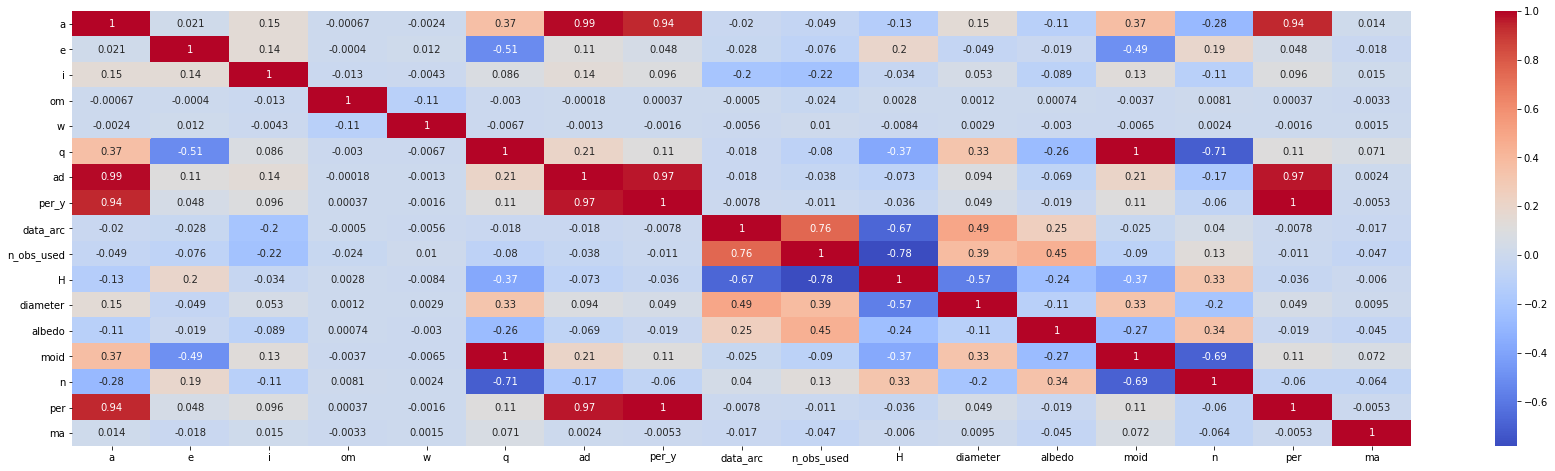

In [ ]:
plt.figure(figsize=(30,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot = True)
plt.show()

### Visualizing some other features as well

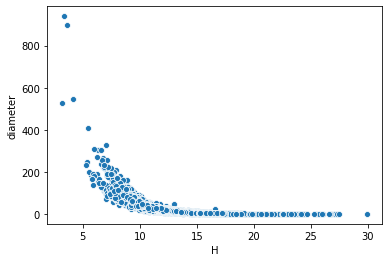

In [ ]:
sns.scatterplot(x='H',y='diameter',data=df)

Text(0, 0.5, 'albedo')

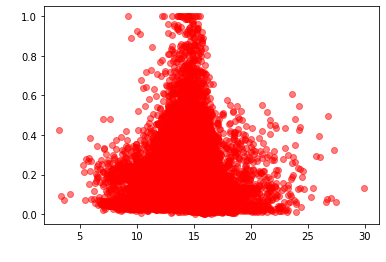

In [ ]:
plt.scatter(x= 'H', y='albedo', data = df, c='r', alpha=0.5)
plt.xlabel('H', c= 'w')
plt.ylabel('albedo', c= 'w')

### Splitting the dataframe into train and test dataframes

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('diameter', axis= 1) 
Y = df['diameter']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### Normalization for our Model.

In [ ]:
from sklearn import preprocessing

#Input standard normalization:
std_scaler = preprocessing.StandardScaler().fit(X_train)

def scaler(X):
    x_norm_arr= std_scaler.fit_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

X_train = scaler(X_train)
X_test = scaler(X_test)

### XG Boost Regression

A small learning rate is "under-fitting" (or the model has "high bias"), and a large learning rate is "over-fitting" (or the model has "high variance").

In [ ]:
# Importing Library
import xgboost as xgb 

# Setting the params
lr = 0.08
max_d = 6
est = 1000

# Creating the object
xgReg = xgb.XGBRegressor(learning_rate = lr , max_depth = max_d, n_estimators = est)

### Training
xgReg.fit(X_train, Y_train)

### Predicting
Y_pred = xgReg.predict(X_test)

[09:03:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Scattering the predicted Values wrt actual values 

Text(0, 0.5, 'Predicted Diameter')

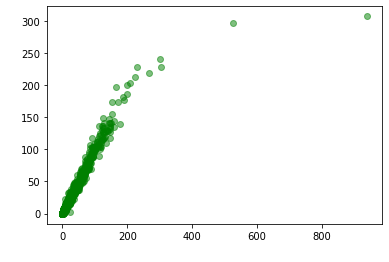

In [ ]:
plt.scatter(Y_test, Y_pred, c='green', alpha=0.5)
plt.xlabel('Actual Diameter', c= 'w')
plt.ylabel('Predicted Diameter', c= 'w')

### Calculating the Metrics
1. Root Mean Squared Error
2. R2_Score

In [ ]:
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error

print("RMSE: ", sqrt(mean_squared_error(Y_test, Y_pred)))
print("R2_Score for test: ", r2_score(Y_test, Y_pred))

RMSE:  3.4948705524475763
R2_Score for test:  0.8755203850433765


### Calculating the Error


### Visualizing the Actual Value and Error in it with the Prediction Value

In [ ]:
# Find Errors by calculating the difference between the actual and rpedicted values

Errors = Y_test - Y_pred

<BarContainer object of 41291 artists>

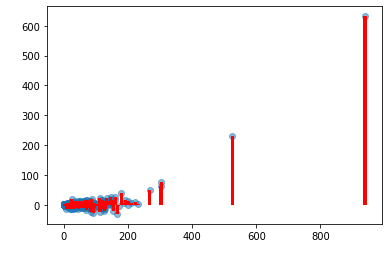

In [ ]:
#Scatter plot between the Actual values and Error term
plt.scatter(Y_test, Errors, alpha=0.5)
plt.xlabel("Actual Values", c = 'w')
plt.ylabel("Error in Actual values", c = 'w')

# Plotting the bar graph for the same
plt.bar(Y_test, Errors, width = 10.0, color = 'r') 